In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statistics import mean

In [0]:
df_train = pd.read_csv('Train.csv')
df_rider = pd.read_csv('Riders.csv')
df_sample = pd.read_csv('SampleSubmission.csv')

UNDERSTANDING THE DATA

In [26]:
df_train.dtypes  #Checking datatypes of each column

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [27]:
df_rider.dtypes

Rider Id           object
No_Of_Orders        int64
Age                 int64
Average_Rating    float64
No_of_Ratings       int64
dtype: object

In [28]:
df_sample.dtypes

Order_No                        object
Time from Pickup to Arrival    float64
dtype: object

In [29]:
df_train.describe() #Checking the statistical summary of the dataframe

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [30]:
df_rider.describe()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,960.000000,960.000000,960.000000,960.000000
mean,1864.851042,1200.234375,13.412604,427.983333
std,1880.337785,810.930171,2.675794,486.957931
min,2.000000,96.000000,0.000000,0.000000
25%,261.750000,478.250000,13.500000,30.000000
50%,1475.500000,1021.000000,14.000000,223.000000
75%,2847.250000,1891.500000,14.300000,678.750000
max,9756.000000,3764.000000,15.200000,2298.000000


In [31]:
df_sample.describe()

,Time from Pickup to Arrival
count,3.000000
mean,3706.333333
std,2744.210147
min,567.000000
25%,2735.000000
50%,4903.000000
75%,5276.000000
max,5649.000000


DEALING WITH MISSING DATA

In [32]:
df_train.info()  #Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [33]:
df_rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [34]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Order_No                     7068 non-null   object 
 1   Time from Pickup to Arrival  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 110.6+ KB


In [0]:
df_train = df_train.fillna(df_train.mean()) #Replacing null values with the mean of the columns

In [0]:
"""One of the Rider Id rows contains a NaN value"""
df_train.dropna(inplace = True) #Removing this entire row

In [37]:
df_train.info()  #Checking for null values again.
"""There are no longer any null values"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

'There are no longer any null values'

ANALYSING TRAINS DATASET

In [40]:
"""The only vehicle type used by the drivers are bikes."""
df_train['Vehicle Type'].unique()


array(['Bike'], dtype=object)

In [43]:
"""There are four different platforms used by customers use to place there orders."""
df_train['Platform Type'].unique()


array([3, 1, 2, 4])

'Bar graph below shows that the most popular platform is 3. 4 being the least popular platform.'

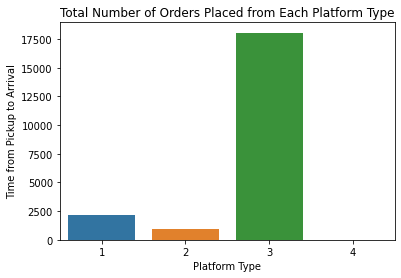

In [47]:
sns.barplot(x = 'Platform Type', y = 'Time from Pickup to Arrival', data = df_train, 
            estimator = len).set_title('Total Number of Orders Placed from Each Platform Type')

"""Bar graph below shows that the most popular platform is 3. 4 being the least popular platform."""

'Most of the orders are business related.'

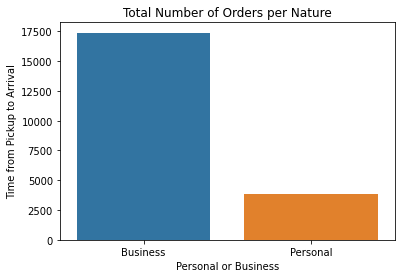

In [49]:
sns.barplot(x = 'Personal or Business', y = 'Time from Pickup to Arrival', data = df_train, 
            estimator = len).set_title('Total Number of Orders per Nature')
"""Most of the orders are business related."""

ANALYSING RIDERS DATASET

In [50]:
#Extracting the top twenty riders based on their average ratings from customers
df_sorted = df_rider.sort_values(by = ['Average_Rating'], ascending = False).head(20) 
#Left join to merge the delivery time for the top twenty riders with the dataframe created above
df_sorted = pd.merge(df_sorted,df_train,on='Rider Id',how='left')
df_sorted = df_sorted[['Rider Id', 'Average_Rating', 'Time from Pickup to Arrival']]
df_sorted = df_sorted.groupby(by = 'Rider Id').mean()
df_sorted.sort_values(by = 'Average_Rating', ascending = False)
#Creating a new column to display whether or not the average delivery time of the rider is lower than the average delivery
#time of all the drivers.
df_sorted['Smaller than Average'] = df_sorted['Time from Pickup to Arrival'] < df_train['Time from Pickup to Arrival'].mean()
df_sorted.head(5)

,Average_Rating,Time from Pickup to Arrival,Smaller than Average
Rider Id,,,
Rider_Id_135,15.1,NaN,False
Rider_Id_17,15.0,2154.000000,False
Rider_Id_181,15.0,2318.200000,False
Rider_Id_183,15.0,1754.933333,False
Rider_Id_262,15.0,1752.500000,False


In [52]:
"""There is no real relationship between the average rating of the driver and whether or not he would beat the average
delivery time."""
df_sorted['Smaller than Average'].value_counts()


False    14
True      6
Name: Smaller than Average, dtype: int64

JOIN THE RIDERS AND TRAIN DATASETS

In [0]:
df = pd.merge(df_train, df_rider, on  = 'Rider Id')
df.head()

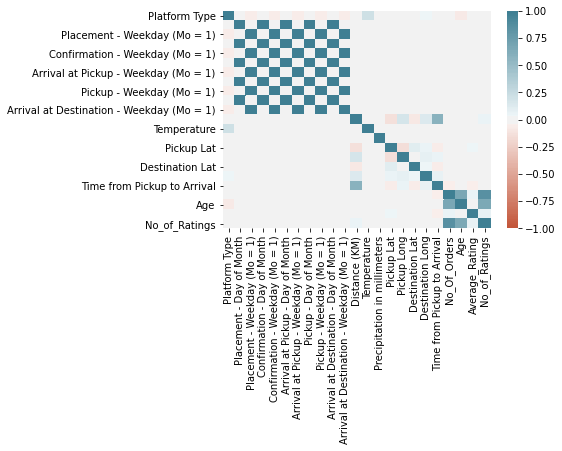

In [54]:
corr = df.corr()
ax = sns.heatmap(corr, cmap = sns.diverging_palette(20, 220, n=200),  vmax = 1, vmin = -1 , center = 0 )  

ANALYSE THE JOINED DATASETS

In [55]:
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [56]:
"""Group data by Rider Id to show how the averages correlate"""
#Drop all object type data
#Group by Rider Id recording the mean value of each column for the riders.
df_grp = df.drop(['Order No', 'User Id', 'Vehicle Type', 'Personal or Business', 'Placement - Time','Confirmation - Time','Arrival at Pickup - Time', 'Pickup - Time', 'Arrival at Destination - Time' ], axis = 1)
df_grp = df_grp.groupby('Rider Id').mean()
df_grp.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Rider Id,,,,,,,,,,,,,,,,,,,,,,,
Rider_Id_0,3.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,12.000000,26.400000,7.905797,-1.329285,36.886785,-1.300921,36.828195,1393.000000,3048.0,2570.0,14.0,512.0
Rider_Id_1,3.000000,19.000000,5.000000,19.000000,5.000000,19.000000,5.000000,19.000000,5.000000,19.000000,5.000000,11.000000,25.000000,7.905797,-1.320715,36.830577,-1.299323,36.775337,1333.000000,8.0,589.0,0.0,1.0
Rider_Id_10,3.000000,18.078431,3.607843,18.078431,3.607843,18.078431,3.607843,18.078431,3.607843,18.078431,3.607843,9.490196,23.250763,7.797499,-1.310236,36.825240,-1.294703,36.800791,529.098039,6978.0,1990.0,13.3,413.0
Rider_Id_100,2.484848,14.222222,3.252525,14.222222,3.252525,14.222222,3.252525,14.222222,3.252525,14.222222,3.252525,8.171717,22.059899,7.627727,-1.281512,36.813023,-1.276978,36.814100,1271.929293,362.0,910.0,13.4,109.0
Rider_Id_101,2.469945,16.612022,3.311475,16.612022,3.311475,16.612022,3.311475,16.612022,3.311475,16.612022,3.311475,10.491803,22.172945,7.789855,-1.269583,36.803790,-1.280071,36.808981,1755.579235,1299.0,986.0,13.1,287.0


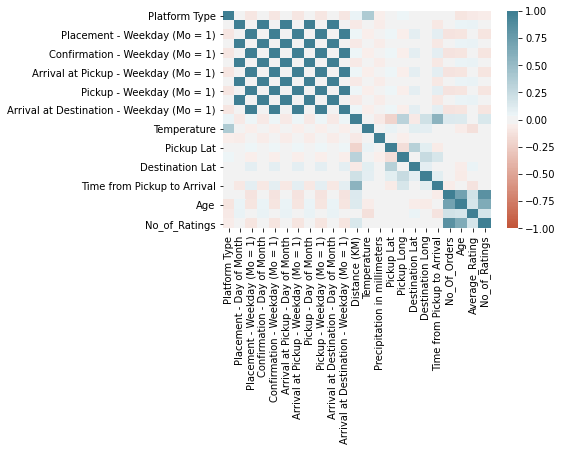

In [57]:
"""Heatmap of grouped dataset"""
corr = df_grp.corr()
ax = sns.heatmap(corr, cmap = sns.diverging_palette(20, 220, n=200),  vmax = 1, vmin = -1 , center = 0 )  

In [58]:
"""Ten fastest riders"""
df_grp_2 = pd.merge(df_train, df_rider, on  = 'Rider Id')
df_grp_2['Speed (KM/s)'] = df_grp_2['Distance (KM)']/df_grp_2['Time from Pickup to Arrival']
df_grp_2 = df_grp_2.groupby('Rider Id').mean()
#df_grp_2.head()
df_grp_2 = df_grp_2['Speed (KM/s)']
df_grp_2.head(10)

Rider Id
Rider_Id_0      0.008615
Rider_Id_1      0.008252
Rider_Id_10     1.646458
Rider_Id_100    0.006830
Rider_Id_101    0.006981
Rider_Id_102    0.026923
Rider_Id_103    0.007892
Rider_Id_104    0.003400
Rider_Id_105    0.007641
Rider_Id_106    0.006317
Name: Speed (KM/s), dtype: float64

'Most of the orders are placed between the 7th to the 13th day of the month. During these days the fastest riders \nshould be working in order to ensure the fastest delivery times on these high demand days.'

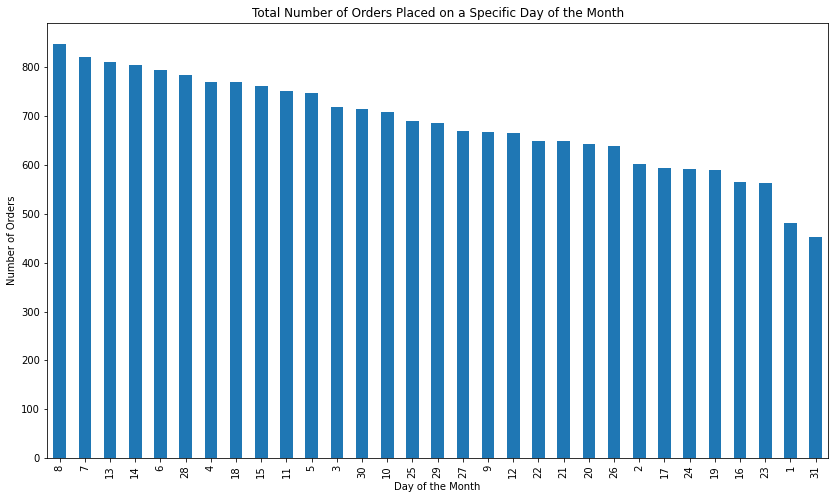

In [59]:
ax = df_train['Placement - Day of Month'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Total Number of Orders Placed on a Specific Day of the Month")

ax.set_xlabel("Day of the Month")
ax.set_ylabel("Number of Orders")
"""Most of the orders are placed between the 7th to the 13th day of the month. During these days the fastest riders 
should be working in order to ensure the fastest delivery times on these high demand days."""

SCATTER PLOTS

In [0]:
"""Function used to determine slope of best fit line"""
def best_fit_slope(X,y):
  m = ((mean(X) * mean(y)) - mean(X * y))/ ((mean(X)**2) - (mean(X**2)))
  return m

In [0]:
"""Function used to determine y-intercept of best fit line"""
def best_fit_yintercept(X, y, m):
  b = mean(y) - (m*mean(X))
  return b

In [0]:
X = df['Average_Rating']
y = df['Time from Pickup to Arrival']
m = best_fit_slope(X,y)
b = best_fit_yintercept(X, y, m)
y_line = m*X + b
plt.plot(X, y_line, color = 'red')
plt.scatter(X, y)
plt.ylabel('Time from Pickup to Arrival')
plt.xlabel('Average Rating')
plt.title('Delivery Time versus Average Rating')

In [0]:
X = df['Distance (KM)']
y = df['Time from Pickup to Arrival']
m = best_fit_slope(X,y)
b = best_fit_yintercept(X, y, m)
y_line = m*X + b
plt.plot(X, y_line, color = 'red')
plt.scatter(X, y)
plt.ylabel('Time from Pickup to Arrival')
plt.xlabel('Distance (KM)')
plt.title('Delivery Time versus Distance')

Text(0.5, 1.0, 'No of Ratings versus Average Ratings')

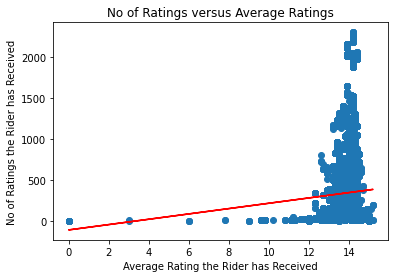

In [70]:
X = df['Average_Rating']
y = df['No_of_Ratings']
m = best_fit_slope(X,y)
b = best_fit_yintercept(X, y, m)
y_line = m*X + b
plt.plot(X, y_line, color = 'red')
plt.scatter(X, y)
plt.ylabel('No of Ratings the Rider has Received')
plt.xlabel('Average Rating the Rider has Received')
plt.title('No of Ratings versus Average Ratings')

BOX PLOTS

'The boxplot shows the average time each delivery took is the same for every platform, therefore using this variable in our regression model would prove\nto be pointless'

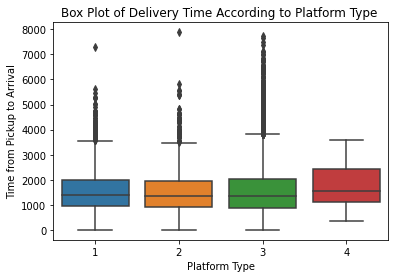

In [71]:
sns.boxplot( x = 'Platform Type', y = 'Time from Pickup to Arrival', 
            data = df).set_title('Box Plot of Delivery Time According to Platform Type ')
"""The boxplot shows the average time each delivery took is the same for every platform, therefore using this variable in our regression model would prove
to be pointless"""

RESIDUAL PLOTS

'Signs of heteroscedascity can be seen in the plots above and below. \n Nonlinear models appropriate for these relationships.'

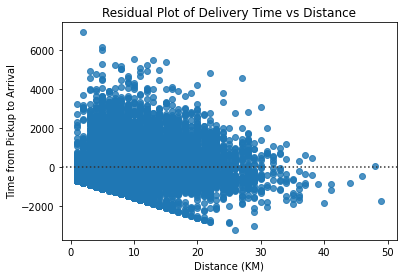

In [73]:
"""If residuals are randomly spread out around x-axis then a linear model is appropriate.
Not randomly spread around the x-axis means linear model is not appropriate. Non-linear model may be appropriate."""

sns.residplot(df['Distance (KM)'], df['Time from Pickup to Arrival']
              ).set_title('Residual Plot of Delivery Time vs Distance')
"""Signs of heteroscedascity can be seen in the plots above and below. 
 Nonlinear models appropriate for these relationships."""

Text(0.5, 1.0, 'Residual Plot of Delivery Time versus Average Rating of Riders')

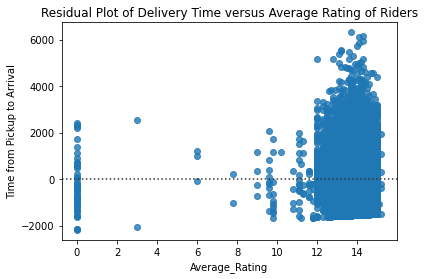

In [75]:
sns.residplot(df['Average_Rating'], df['Time from Pickup to Arrival']
              ).set_title('Residual Plot of Delivery Time versus Average Rating of Riders')

Text(0.5, 1.0, 'Residual Plot of No. of Ratings versus Average Rating')

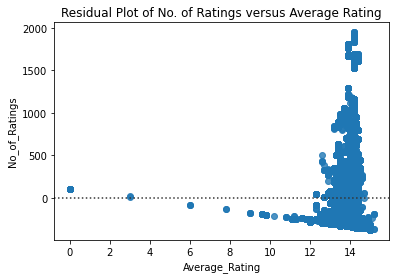

In [79]:
sns.residplot(df['Average_Rating'], df['No_of_Ratings']
              ).set_title('Residual Plot of No. of Ratings versus Average Rating')